# Data Cleaning/Processing
### - Duplicates
### - Irrelevant Data
### - Missing Values
### - Outliers

In [69]:
### Import necessary libraries
import pandas as pd  # Data manipulation and analysis.
import numpy as np   # Numerical operations and arrays. 
import matplotlib.pyplot as plt  # Basic plotting.
import seaborn as sns  # Aesthetic statistical plots.
from scipy import stats  # Statistical functions.
from itertools import combinations  # Combinatorial functions.

pd.set_option('display.max_columns', None) # Display all columns in DataFrame output.
pd.set_option('display.max_rows', None) # Display all rows in DataFrame output.


## Quick Understanding

#### Load Data from a CSV

In [70]:
df_raw = pd.read_csv('data/health_lifestyle_classification.csv')
df = df_raw.copy() # make a copy of the original dataframe
df.shape # get the number of rows and columns

(100000, 48)

In [71]:
df.head() # Show the first 5 rows of the DataFrame to understand its structure.

,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,screen_time,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target
0,1,56,Male,173.416872,56.886640,18.915925,18.915925,56.747776,18.989117,72.165130,118.264254,60.749825,214.580523,103.008176,NaN,6.475885,Fair,7.671313,0.356918,13320.942595,2673.546960,44.476887,NaN,Non-smoker,1.694262,5.003963,2,8,No,PhD,Tech,Farmer,6759.821719,Vegan,Strength,High,Poor,No,High,5,Moderate,No,Yes,0,1.0,5.5,-2.275502,healthy
1,2,69,Female,163.207380,97.799859,36.716278,36.716278,110.148833,36.511417,85.598889,117.917986,66.463696,115.794002,116.905134,10.131597,8.428410,Good,9.515198,0.568219,11911.201401,2650.376972,74.663405,Regularly,Light,0.716409,5.925455,3,9,No,High School,Office,Engineer,6240.517690,Vegan,Cardio,Moderate,Moderate,No,High,5,High,Yes,No,0,1.0,5.5,6.239340,healthy
2,3,46,Male,177.281966,80.687562,25.673050,25.673050,77.019151,25.587429,90.295030,123.073698,76.043212,138.134787,89.180302,NaN,5.702164,Poor,5.829853,3.764406,2974.035375,1746.755144,19.702382,Regularly,Heavy,2.487900,4.371250,0,1,No,Master,Office,Teacher,3429.179266,Vegan,Cardio,High,Good,Yes,High,4,Moderate,No,No,0,1.0,5.5,5.423737,healthy
3,4,32,Female,172.101255,63.142868,21.318480,21.318480,63.955440,21.177109,100.504211,148.173453,68.781981,203.017447,128.375798,18.733179,5.188316,Good,9.489693,0.889474,5321.539497,2034.193242,82.580050,Occasionally,Heavy,2.643335,4.116064,10,4,No,Master,Labor,Teacher,2618.503534,Vegetarian,Mixed,Low,Moderate,No,High,1,NaN,No,Yes,0,1.0,5.5,8.388611,healthy
4,5,60,Female,163.608816,40.000000,14.943302,14.943302,44.829907,14.844299,69.021150,150.613181,92.335358,200.412439,94.813332,16.038701,7.912514,Good,7.275450,2.901608,9791.376712,2386.210257,45.961322,NaN,Heavy,1.968393,3.180087,9,7,Yes,Master,Unemployed,Doctor,3662.086276,Vegan,NaN,Low,Moderate,Yes,High,1,High,Yes,Yes,0,1.0,5.5,0.332622,healthy


In [72]:
# Returns information about the DataFrame, including data types and non-null counts.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   survey_code               100000 non-null  int64  
 1   age                       100000 non-null  int64  
 2   gender                    100000 non-null  object 
 3   height                    100000 non-null  float64
 4   weight                    100000 non-null  float64
 5   bmi                       100000 non-null  float64
 6   bmi_estimated             100000 non-null  float64
 7   bmi_scaled                100000 non-null  float64
 8   bmi_corrected             100000 non-null  float64
 9   waist_size                100000 non-null  float64
 10  blood_pressure            92331 non-null   float64
 11  heart_rate                85997 non-null   float64
 12  cholesterol               100000 non-null  float64
 13  glucose                   100000 non-null  fl

In [73]:
# Returns summary statistics for numerical columns in the DataFrame, including count, mean, std, min, 25th percentile, median, 75th percentile, and max.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
survey_code,100000.0,50000.500000,28867.657797,1.000000,25000.750000,50000.500000,75000.250000,100000.000000
age,100000.0,48.525990,17.886768,18.000000,33.000000,48.000000,64.000000,79.000000
height,100000.0,170.023707,9.982798,140.000000,163.306615,170.016778,176.728920,210.000000
weight,100000.0,70.064862,14.693667,40.000000,59.856938,69.924141,80.027418,139.250894
bmi,100000.0,24.493876,5.951069,9.988495,20.271405,24.156734,28.258696,59.234792
bmi_estimated,100000.0,24.493876,5.951069,9.988495,20.271405,24.156734,28.258696,59.234792
bmi_scaled,100000.0,73.481627,17.853206,29.965484,60.814215,72.470201,84.776088,177.704377
bmi_corrected,100000.0,24.494140,5.954184,9.893845,20.271059,24.151699,28.247648,59.142646
waist_size,100000.0,84.933043,12.040314,34.093185,76.795185,84.957139,93.018713,133.153631
blood_pressure,92331.0,119.980149,15.015503,59.128168,109.812060,119.951794,130.120621,184.439195


### 1. Handle Duplicates

In [74]:
# Get the columns list of dataframe
print(df.columns)

Index(['survey_code', 'age', 'gender', 'height', 'weight', 'bmi',
       'bmi_estimated', 'bmi_scaled', 'bmi_corrected', 'waist_size',
       'blood_pressure', 'heart_rate', 'cholesterol', 'glucose', 'insulin',
       'sleep_hours', 'sleep_quality', 'work_hours', 'physical_activity',
       'daily_steps', 'calorie_intake', 'sugar_intake', 'alcohol_consumption',
       'smoking_level', 'water_intake', 'screen_time', 'stress_level',
       'mental_health_score', 'mental_health_support', 'education_level',
       'job_type', 'occupation', 'income', 'diet_type', 'exercise_type',
       'device_usage', 'healthcare_access', 'insurance', 'sunlight_exposure',
       'meals_per_day', 'caffeine_intake', 'family_history', 'pet_owner',
       'electrolyte_level', 'gene_marker_flag', 'environmental_risk_score',
       'daily_supplement_dosage', 'target'],
      dtype='object')


In [75]:
# According to the results of df.describe().transpose(), the mean/std values of bmi and bmi_estimated are same. 
# There are other columns containing 'bmi' in their names, such as bmi_scaled and bmi_corrected. Check their similarity.

# Find all columns whose names contain 'bmi'
bmi_cols = [c for c in df.columns if 'bmi' in c]

results = []

for col1, col2 in combinations(bmi_cols, 2):
    # 1. Check if two columns are completely identical (including NaN positions)
    identical = df[col1].equals(df[col2])
    
    # 2. Calculate match ratio: proportion of rows where values are equal
    #    - Use np.isclose to handle floating-point precision issues
    #    - equal_nan=True treats NaN values as equal
    arr1, arr2 = df[col1].values, df[col2].values
    # Build a helper frame and drop rows where both values are NaN
    tmp = pd.DataFrame({'a': arr1, 'b': arr2})
    tmp_valid = tmp.dropna(how='all')
    match_ratio = (np.isclose(tmp_valid['a'], tmp_valid['b'], equal_nan=True)).mean() if len(tmp_valid) else np.nan
    
    results.append({
        "col1": col1,
        "col2": col2,
        "Identical": identical,
        "Match Ratio": match_ratio
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

print("---- BMI-related columns:", bmi_cols)
print("\nPairwise comparison results:")
print(results_df)

# Print identical column pairs
print("\n----Identical column pairs:")
print(results_df[results_df["Identical"]])

# Print highly similar column pairs
print("\n----Highly similar column pairs:")
print(results_df[results_df["Match Ratio"] > 0.95])

---- BMI-related columns: ['bmi', 'bmi_estimated', 'bmi_scaled', 'bmi_corrected']

Pairwise comparison results:
            col1           col2  Identical  Match Ratio
0            bmi  bmi_estimated       True      1.00000
1            bmi     bmi_scaled      False      0.00000
2            bmi  bmi_corrected      False      0.00112
3  bmi_estimated     bmi_scaled      False      0.00000
4  bmi_estimated  bmi_corrected      False      0.00112
5     bmi_scaled  bmi_corrected      False      0.00000

----Identical column pairs:
  col1           col2  Identical  Match Ratio
0  bmi  bmi_estimated       True          1.0

----Highly similar column pairs:
  col1           col2  Identical  Match Ratio
0  bmi  bmi_estimated       True          1.0


In [76]:
# According to the results above, 'bmi' and 'bmi_estimated' are duplicates.
# For modeling keep engineered variants and drop the raw pair: keep ['bmi_scaled','bmi_corrected'], drop ['bmi','bmi_estimated'].
# Drop the bmi and bmi_estimated columns.
df.drop(columns=['bmi','bmi_estimated'], inplace=True)  # Drop raw BMI variants; keep corrected/scaled.
df.shape  # Check the shape of the DataFrame after dropping the column.

(100000, 46)

In [77]:
# Check for duplicates in each column and print the count.
for col in df.columns:  # Loop every column.
    duplicated_count = df[col].duplicated().sum()  # How many repeated values.
    print(f'Column: {col}')  # Show column name.
    print(f'Duplicate Count: {duplicated_count}')  # Print count.
    print('*'*50)  # Separator.

Column: survey_code
Duplicate Count: 0
**************************************************
Column: age
Duplicate Count: 99938
**************************************************
Column: gender
Duplicate Count: 99998
**************************************************
Column: height
Duplicate Count: 157
**************************************************
Column: weight
Duplicate Count: 2297
**************************************************
Column: bmi_scaled
Duplicate Count: 4
**************************************************
Column: bmi_corrected
Duplicate Count: 0
**************************************************
Column: waist_size
Duplicate Count: 0
**************************************************
Column: blood_pressure
Duplicate Count: 7668
**************************************************
Column: heart_rate
Duplicate Count: 14002
**************************************************
Column: cholesterol
Duplicate Count: 0
**************************************************
Column: glu

In [78]:
# Remove duplicate rows considering all columns.
df = df.drop_duplicates()  # New frame without duplicate rows.
df.shape

(100000, 46)

In [79]:
if 'survey_code' in df.columns:  # Ensure column exists.
    duplicate_by_code = df[df.duplicated(subset=['survey_code'], keep=False)]  # All duplicates by survey_code.
duplicate_by_code.shape 

(0, 46)

## 2. Handle Irrelevant Data

In [80]:
# Find constant columns.
constant_cols = []
for col in df.columns:
    nunique = df[col].nunique(dropna=True) # Count unique values, ignoring NaN
    if nunique == 1:
        constant_cols.append(col)

print("Constant columns:", constant_cols)


Constant columns: ['electrolyte_level', 'gene_marker_flag', 'environmental_risk_score']


In [81]:
# Drop constant columns.
df = df.drop(columns=constant_cols)  # New frame.
df.shape

(100000, 43)

In [82]:
# Columns with mostly missing values (more than 10% missing)
threshold = 10
print(f"Total records {df.shape[0]}")
print("*"* 50)
for col in df.columns:
    missing_count = df[col].isnull().sum()
    missing_ratio = (missing_count / df.shape[0]) * 100
    if missing_ratio > threshold:
        print(f"Column: {col} has {missing_count} missing values ({missing_ratio:.2f}%)")
        print("*" * 50)

Total records 100000
**************************************************
Column: heart_rate has 14003 missing values (14.00%)
**************************************************
Column: insulin has 15836 missing values (15.84%)
**************************************************
Column: alcohol_consumption has 42387 missing values (42.39%)
**************************************************
Column: exercise_type has 24969 missing values (24.97%)
**************************************************
Column: caffeine_intake has 33261 missing values (33.26%)
**************************************************


In [83]:
# Remove columns with more than 10% missing values.
columns_to_drop = [col for col in df.columns if (df[col].isnull().sum() / df.shape[0]) * 100 > threshold]
df_irrelevant_removed = df.drop(columns=columns_to_drop)
df_irrelevant_removed.shape, df.shape  # Compare shapes.

((100000, 38), (100000, 43))

### 3.1 Pre-handle missing values
Distinguish and explain "sign errors" vs "medically impossible values":
- Blank ('') and medically impossible 0 (blood pressure/heart rate/insulin) → treated as missing (NaN), to be imputed using standard missing value methods;
- Negative values with similar magnitude to positive values, only differing in sign (data entry sign error) → perform "sign correction" (take absolute value), not missing, retain information as much as possible;
- If negative values are rare and differ greatly from positive values (suspected anomaly, not just sign error) → standardize as missing, then impute according to final strategy.
- Note: Columns with >10% missing were removed earlier (prediction focus), reducing noise and effort; remaining columns are imputed here.

In [84]:
# The 'daily_supplement_dosage' column contains many negative values but they are similar magnitude to positive values, only differing in sign 
# Perform "sign correction" (take absolute value), not missing, retain information as much as possible;
# Standardize an obvious sign mistake before filling 
df_mv = df_irrelevant_removed.copy()  # Working copy. 
# daily_supplement_dosage: sign correction
if 'daily_supplement_dosage' in df_mv.columns:  # Ensure exists. 
    s = pd.to_numeric(df_mv['daily_supplement_dosage'], errors='coerce')  # Numeric.
    print('Negatives before:', int((s < 0).sum()))  # Count negatives. 
    df_mv.loc[s < 0, 'daily_supplement_dosage'] = s.abs()  # Make positive. 
    print('Negatives after :', int((pd.to_numeric(df_mv['daily_supplement_dosage'], errors='coerce') < 0).sum()))  # Should be 0.

Negatives before: 49911
Negatives after : 0


In [85]:
# sugar_intake: Very few negative values observed, and they differ greatly from positives → treated as outliers, not simple sign errors
# Handling strategy: Standardize negatives as missing (NaN), to be imputed later using the final missing value strategy (more robust)
if 'sugar_intake' in df_mv.columns:  # Ensure exists.
    s2 = pd.to_numeric(df_mv['sugar_intake'], errors='coerce')  # Numeric.
    neg_before = int((s2 < 0).sum())  # Count negatives.
    print('sugar_intake negatives before:', neg_before)
    if neg_before:
        df_mv.loc[s2 < 0, 'sugar_intake'] = np.nan # normalize as missing
    neg_after = int((pd.to_numeric(df_mv['sugar_intake'], errors='coerce') < 0).sum())
    print('sugar_intake negatives after :', neg_after)  # should be 0

sugar_intake negatives before: 124
sugar_intake negatives after : 0


In [86]:
# Standardize whitespace/NA-like markers and impossible zeros before imputation
# 1) Use strip + replace with a value list
obj_cols = df_mv.select_dtypes(include=['object']).columns
for c in obj_cols:
    s = df_mv[c].astype('string').str.strip()   # trim leading/trailing spaces
    df_mv[c] = s.replace([
        '', 'na', 'n/a', 'none', 'null',
        'NA', 'N/A', 'None', 'NULL'
    ], np.nan)  # normalize common NA-like tokens to NaN
print('Standardized whitespace/NA-like tokens to NaN on object columns')

# 2) Convert medically-impossible zeros to NaN for vitals (do not impute yet)
for col in [c for c in ['insulin','blood_pressure','heart_rate'] if c in df_mv.columns]:
    df_mv[col] = pd.to_numeric(df_mv[col], errors='coerce')
    zeros = int((df_mv[col] == 0).sum())
    if zeros:
        df_mv.loc[df_mv[col] == 0, col] = np.nan
        print(f"{col}: zeros→NaN converted: {zeros}")


Standardized whitespace/NA-like tokens to NaN on object columns


### 3.2 Show missing value details

In [87]:
# Display the DataFrame having missing data.
df_missing_data = df_mv[df_mv.isnull().any(axis=1)]
df_missing_data.shape

(22605, 38)

In [88]:
df_missing_data.tail() # Show the last 5 rows of the DataFrame with missing data.

,survey_code,age,gender,height,weight,bmi_scaled,bmi_corrected,waist_size,blood_pressure,cholesterol,glucose,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,smoking_level,water_intake,screen_time,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,family_history,pet_owner,daily_supplement_dosage,target
99978,99979,52,Female,169.046335,64.683330,67.905056,22.876406,69.995170,135.744781,163.042854,124.772467,6.956526,Poor,8.932546,0.000000,6782.230131,2445.079719,58.636354,Light,3.250524,6.312386,1,4,No,Master,Tech,Farmer,NaN,Keto,Low,Good,Yes,High,2,Yes,Yes,4.036342,diseased
99982,99983,22,Female,184.762808,71.255450,62.619592,21.022015,80.705780,133.076491,167.931256,146.738276,8.833810,Good,9.857013,1.725103,NaN,2726.895716,78.430569,Light,0.550362,5.412425,8,8,No,PhD,Office,Engineer,2634.608185,Keto,Low,Poor,No,High,2,No,No,9.624349,healthy
99989,99990,24,Female,178.190353,79.022329,74.662530,25.090028,103.810718,106.953770,235.859473,149.859675,6.067314,Good,7.486399,3.638711,5866.816885,1844.425885,88.638041,Non-smoker,2.920453,1.078467,9,8,Yes,Master,Office,Artist,NaN,Keto,Low,Good,Yes,High,5,No,No,0.190082,healthy
99993,99994,23,Male,177.338167,78.616056,74.994269,24.731886,101.598410,129.585635,199.201499,103.395450,8.186916,Poor,4.481274,1.810744,NaN,1822.832319,94.356280,Heavy,1.771010,10.946500,1,3,Yes,Master,Office,Artist,3058.361752,Vegetarian,High,Moderate,No,Low,3,No,Yes,5.230766,healthy
99997,99998,37,Male,185.540653,84.536847,73.669741,24.172944,98.920422,146.504768,178.481690,84.087533,6.769285,Good,6.788728,2.018741,NaN,1958.958856,52.222350,Heavy,0.931263,6.201348,2,3,Yes,PhD,Tech,Driver,4374.490944,Keto,Low,Good,Yes,Low,5,No,No,9.736463,healthy


In [89]:
# Identify numerical and categorical columns.
numerical_columns = df_missing_data.select_dtypes(include=[np.number]).columns # Numerical columns.
categorical_columns = df_missing_data.select_dtypes(include=['object', 'category']).columns # Categorical columns.
print("--- Numerical columns:", numerical_columns)
print("--- Categorical columns:", categorical_columns)

--- Numerical columns: Index(['survey_code', 'age', 'height', 'weight', 'bmi_scaled', 'bmi_corrected',
       'waist_size', 'blood_pressure', 'cholesterol', 'glucose', 'sleep_hours',
       'work_hours', 'physical_activity', 'daily_steps', 'calorie_intake',
       'sugar_intake', 'water_intake', 'screen_time', 'stress_level',
       'mental_health_score', 'income', 'meals_per_day',
       'daily_supplement_dosage'],
      dtype='object')
--- Categorical columns: Index([], dtype='object')


In [90]:
# Get the list of columns with missing values only for numerical columns.
missing_numerical_columns = df_missing_data[numerical_columns].isnull().any()
missing_numerical_columns = missing_numerical_columns[missing_numerical_columns].index
print("Numerical columns with missing values:", missing_numerical_columns.tolist())

Numerical columns with missing values: ['blood_pressure', 'daily_steps', 'sugar_intake', 'income']


In [91]:
# Get the list of columns with missing values only for categorical columns.
missing_categorical_columns = df_missing_data[categorical_columns].isnull().any()
missing_categorical_columns = missing_categorical_columns[missing_categorical_columns].index
print("Categorical columns with missing values:", missing_categorical_columns.tolist())

Categorical columns with missing values: []


### 3.3 Final missing value strategy
- Observation: at this stage only NUMERIC columns contain missing values; categorical columns currently have none.
- Numeric columns: median (robust to outliers).
- Categorical columns: Categorical columns currently have none, no action now.

In [92]:
df_after_mv = df_mv.copy()  # Copy before final fill.
num_cols = df_after_mv.select_dtypes(include=['number']).columns  # Numeric cols.
cat_cols = df_after_mv.select_dtypes(include=['object']).columns  # Categorical cols.
df_after_mv[num_cols] = df_after_mv[num_cols].fillna(df_after_mv.median(numeric_only=True))  # Median fill (robust).
for c in cat_cols:  # Mode fill each categorical.
    if df_after_mv[c].isna().any():
        df_after_mv[c] = df_after_mv[c].fillna(df_after_mv[c].mode().iloc[0])
df_after_mv.isna().sum().head(12).to_frame('missing_after')  # Show remaining NA (should be 0).


,missing_after
survey_code,0
age,0
gender,0
height,0
weight,0
bmi_scaled,0
bmi_corrected,0
waist_size,0
blood_pressure,0
cholesterol,0


## 4. Handle Outliers
- Analyze distribution characteristics using probability plots
- Select detection method based on data distribution patterns
- Apply outlier treatment to affected columns only

### 4.1 Define the K-IQR method function, where K is a tunable parameter (default 1.5).

In [93]:
# Define IQR method for outlier detection
def find_outliers_IQR_method(input_df, variable, k=1.5):    
    IQR = input_df[variable].quantile(0.75) - input_df[variable].quantile(0.25)
    lower_limit = input_df[variable].quantile(0.25) - (IQR * k)
    upper_limit = input_df[variable].quantile(0.75) + (IQR * k)
    return lower_limit, upper_limit

# Define Z-Score method for outlier detection  
def find_outliers_ZScore_method(input_df, variable, threshold=3):
    # Calculate Z-scores, dropping NaN values
    valid_data = input_df[variable].dropna()
    z_scores = np.abs(stats.zscore(valid_data))
    # Find outlier indices
    outlier_mask = z_scores > threshold
    outlier_indices = valid_data[outlier_mask].index
    outlier_count = len(outlier_indices)
    return outlier_indices, outlier_count

print('Outlier detection methods defined')

Outlier detection methods defined


### 4.2 select numeric columns

In [94]:
# Select numeric columns
num_cols_scan = df_after_mv.select_dtypes(include=['number']).columns  # numeric cols
print('Numeric columns count:', len(num_cols_scan))  # print count
list(num_cols_scan)  # list all numeric columns

Numeric columns count: 23


['survey_code',
 'age',
 'height',
 'weight',
 'bmi_scaled',
 'bmi_corrected',
 'waist_size',
 'blood_pressure',
 'cholesterol',
 'glucose',
 'sleep_hours',
 'work_hours',
 'physical_activity',
 'daily_steps',
 'calorie_intake',
 'sugar_intake',
 'water_intake',
 'screen_time',
 'stress_level',
 'mental_health_score',
 'income',
 'meals_per_day',
 'daily_supplement_dosage']

### 4.3 Analyze Distribution Characteristics
Generate probability plots for all numeric columns to assess normality

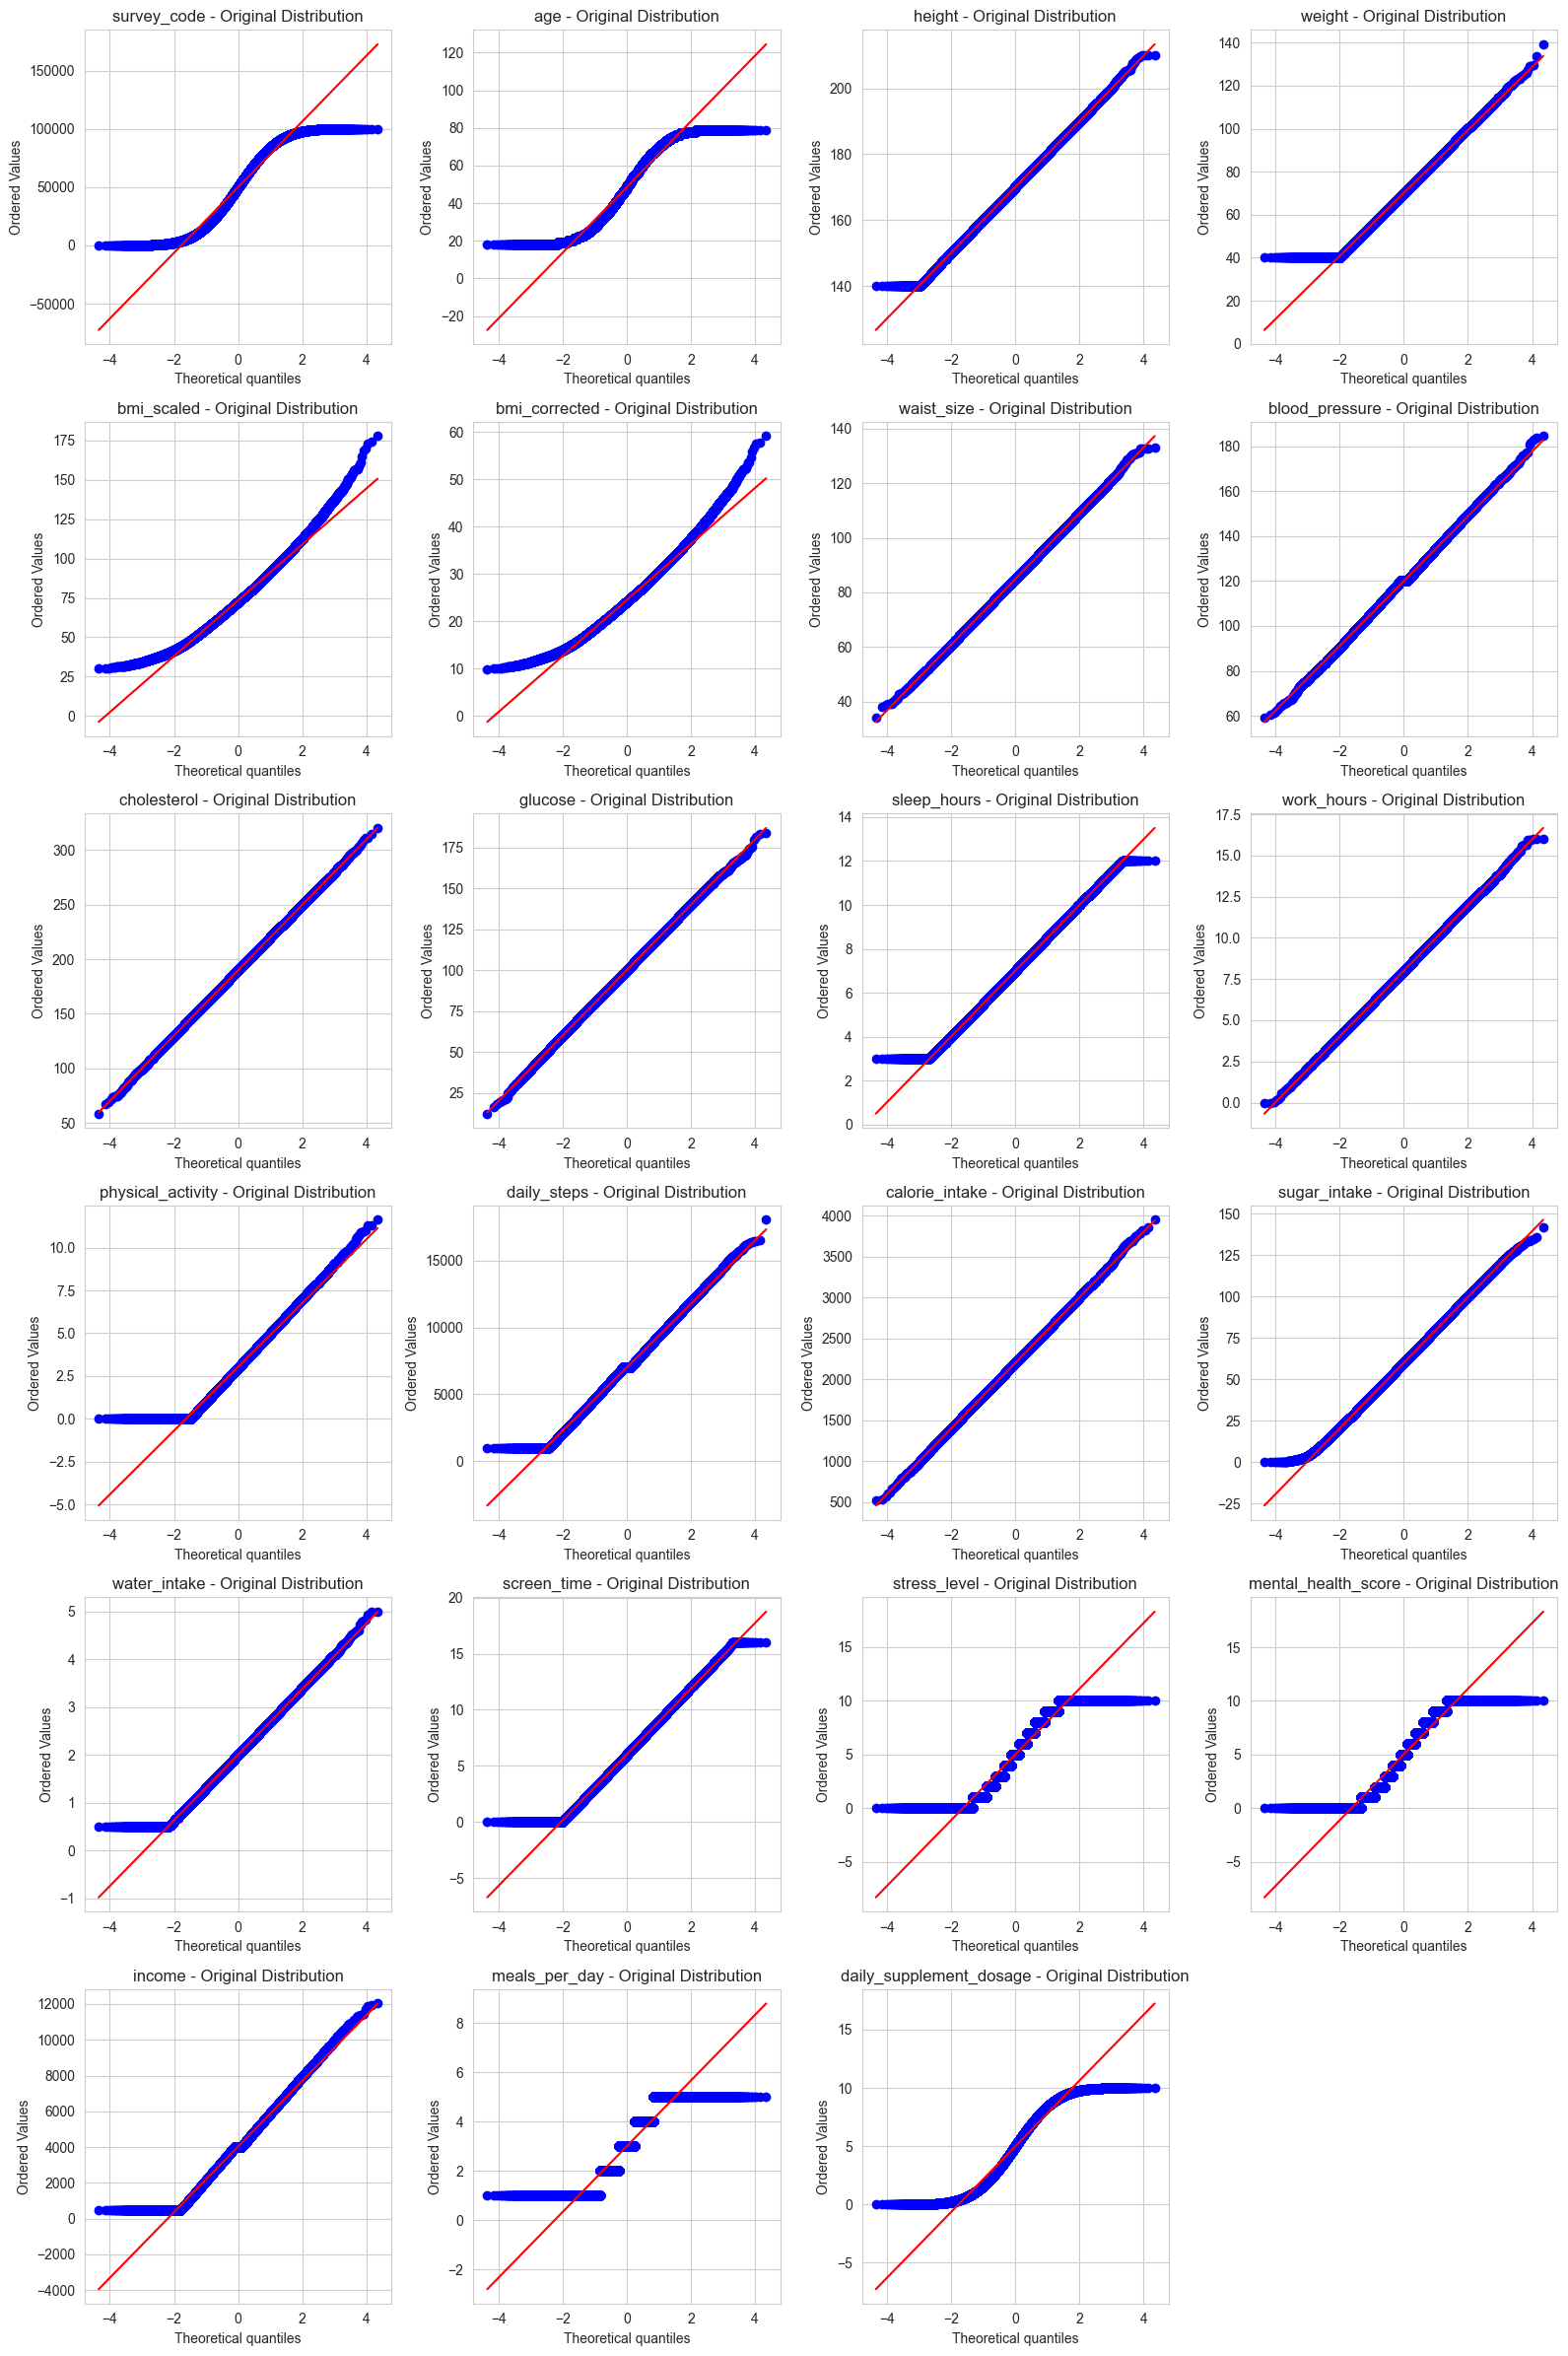

Distribution analysis complete.
Straight line pattern = Normal distribution → use Z-Score method
Curved/S-shaped pattern = Skewed distribution → use IQR method


In [95]:
# Set consistent plotting style
sns.set_style('whitegrid')

# Calculate grid dimensions for subplots
n_cols = len(num_cols_scan)
cols_per_row = 4
n_rows = (n_cols + cols_per_row - 1) // cols_per_row

# Create probability plots for all numeric columns
plt.figure(figsize=(16, 4 * n_rows))

for i, col in enumerate(num_cols_scan):
    plt.subplot(n_rows, cols_per_row, i + 1)
    
    # Generate probability plot
    stats.probplot(df_after_mv[col].dropna(), plot=plt)
    plt.title(f'{col} - Original Distribution')
    
plt.tight_layout()
plt.show()

print('Distribution analysis complete.')
print('Straight line pattern = Normal distribution → use Z-Score method')
print('Curved/S-shaped pattern = Skewed distribution → use IQR method')

### 4.4 Classify Columns by Distribution Pattern
Based on visual inspection of probability plots above

In [96]:
# Classify columns based on distribution characteristics observed from probability plots

# Columns with linear/normal distribution patterns → use Z-Score method
zscore_columns = ['waist_size', 'blood_pressure', 'cholesterol', 'glucose', 'work_hours', 'calorie_intake']

# Columns with curved/skewed distribution patterns → use IQR method
iqr_columns = []
for col in num_cols_scan:
    if col not in zscore_columns:
        iqr_columns.append(col)

print(f'Z-Score method columns ({len(zscore_columns)}): {zscore_columns}')
print(f'IQR method columns ({len(iqr_columns)}): {iqr_columns}')

Z-Score method columns (6): ['waist_size', 'blood_pressure', 'cholesterol', 'glucose', 'work_hours', 'calorie_intake']
IQR method columns (17): ['survey_code', 'age', 'height', 'weight', 'bmi_scaled', 'bmi_corrected', 'sleep_hours', 'physical_activity', 'daily_steps', 'sugar_intake', 'water_intake', 'screen_time', 'stress_level', 'mental_health_score', 'income', 'meals_per_day', 'daily_supplement_dosage']


### 4.5 Scan for Outliers Using Selected Methods
Separate scanning for Z-Score and IQR columns

In [97]:
# Scan Z-Score columns for outliers
zscore_outlier_columns = []
print('=== Z-Score Method Scanning ===')
for col in zscore_columns:
    outlier_indices, outlier_count = find_outliers_ZScore_method(df_after_mv, col)
    outlier_rate = outlier_count / len(df_after_mv)
    print(f'{col}: {outlier_count} outliers ({outlier_rate:.2%})')
    if outlier_count > 0:
        zscore_outlier_columns.append(col)

print(f'\nZ-Score columns with outliers: {zscore_outlier_columns}')

# Scan IQR columns for outliers  
iqr_outlier_columns = []
print('\n=== IQR Method Scanning ===')
for col in iqr_columns:
    lower, upper = find_outliers_IQR_method(df_after_mv, col)
    outlier_mask = (df_after_mv[col] < lower) | (df_after_mv[col] > upper)
    outlier_count = outlier_mask.sum()
    outlier_rate = outlier_count / len(df_after_mv)
    print(f'{col}: {outlier_count} outliers ({outlier_rate:.2%})')
    if outlier_count > 0:
        iqr_outlier_columns.append(col)

print(f'\nIQR columns with outliers: {iqr_outlier_columns}')

# Summary
all_outlier_columns = zscore_outlier_columns + iqr_outlier_columns
print(f'\n=== Summary ===')
print(f'Total columns with outliers: {len(all_outlier_columns)}')
print(f'Z-Score outlier columns: {len(zscore_outlier_columns)}')
print(f'IQR outlier columns: {len(iqr_outlier_columns)}')

=== Z-Score Method Scanning ===
waist_size: 264 outliers (0.26%)
blood_pressure: 330 outliers (0.33%)
cholesterol: 265 outliers (0.27%)
glucose: 264 outliers (0.26%)
work_hours: 237 outliers (0.24%)
calorie_intake: 285 outliers (0.29%)

Z-Score columns with outliers: ['waist_size', 'blood_pressure', 'cholesterol', 'glucose', 'work_hours', 'calorie_intake']

=== IQR Method Scanning ===
survey_code: 0 outliers (0.00%)
age: 0 outliers (0.00%)
height: 750 outliers (0.75%)
weight: 335 outliers (0.34%)
bmi_scaled: 936 outliers (0.94%)
bmi_corrected: 937 outliers (0.94%)
sleep_hours: 326 outliers (0.33%)
physical_activity: 341 outliers (0.34%)
daily_steps: 710 outliers (0.71%)
sugar_intake: 580 outliers (0.58%)
water_intake: 348 outliers (0.35%)
screen_time: 339 outliers (0.34%)
stress_level: 0 outliers (0.00%)
mental_health_score: 0 outliers (0.00%)
income: 682 outliers (0.68%)
meals_per_day: 0 outliers (0.00%)
daily_supplement_dosage: 0 outliers (0.00%)

IQR columns with outliers: ['height'

### 4.6 Process Outliers by Method
Apply different outlier treatment methods based on column classification

In [98]:
# Process outliers using robust one-time removal method
# All outlier detection based on original dataset to avoid chain effects
df_after_outliers = df_after_mv.copy()
initial_rows = len(df_after_outliers)

# Collect all outlier indices based on original dataset
all_outlier_indices = set()

# Process Z-Score outlier columns  
if zscore_outlier_columns:
    print('=== Identifying Z-Score Outliers ===')
    for col in zscore_outlier_columns:
        # Use the function to get outlier indices
        outlier_indices, outliers_found = find_outliers_ZScore_method(df_after_mv, col)
        # Add to outlier set
        all_outlier_indices.update(outlier_indices)
        print(f'{col}: {outliers_found} outliers identified (Z-Score > 3)')

# Process IQR outlier columns
if iqr_outlier_columns:
    print('\n=== Identifying IQR Outliers ===')
    for col in iqr_outlier_columns:
        # Calculate IQR bounds based on original dataset
        lower, upper = find_outliers_IQR_method(df_after_mv, col)
        # Find outlier indices for this column
        outlier_mask = (df_after_mv[col] < lower) | (df_after_mv[col] > upper)
        outlier_indices = df_after_mv[outlier_mask].index
        # Add to outlier set
        all_outlier_indices.update(outlier_indices)
        outliers_found = len(outlier_indices)
        print(f'{col}: {outliers_found} outliers identified (IQR method)')

# One-time removal of all outlier rows
if all_outlier_indices:
    df_after_outliers = df_after_mv.drop(list(all_outlier_indices)).reset_index(drop=True)
    print(f'\n=== One-time Outlier Removal ===')
    print(f'Total unique outlier rows identified: {len(all_outlier_indices)}')
else:
    print('\n=== No Outliers Found ===')
    print('No outlier rows to remove')

final_rows = len(df_after_outliers)

print(f'\n=== Overall Results ===')
print(f'Rows: {initial_rows} → {final_rows}')
print(f'Total rows removed: {initial_rows - final_rows}')
print(f'Data retention rate: {final_rows/initial_rows:.1%}')

=== Identifying Z-Score Outliers ===
waist_size: 264 outliers identified (Z-Score > 3)
blood_pressure: 330 outliers identified (Z-Score > 3)
cholesterol: 265 outliers identified (Z-Score > 3)
glucose: 264 outliers identified (Z-Score > 3)
work_hours: 237 outliers identified (Z-Score > 3)
calorie_intake: 285 outliers identified (Z-Score > 3)

=== Identifying IQR Outliers ===
height: 750 outliers identified (IQR method)
weight: 335 outliers identified (IQR method)
bmi_scaled: 936 outliers identified (IQR method)
bmi_corrected: 937 outliers identified (IQR method)
sleep_hours: 326 outliers identified (IQR method)
physical_activity: 341 outliers identified (IQR method)
daily_steps: 710 outliers identified (IQR method)
sugar_intake: 580 outliers identified (IQR method)
water_intake: 348 outliers identified (IQR method)
screen_time: 339 outliers identified (IQR method)
income: 682 outliers identified (IQR method)

=== One-time Outlier Removal ===
Total unique outlier rows identified: 6564

=

### 4.7 Before/After Comparison Plots
Probability plots showing treatment effectiveness for processed columns

Generating comparison plots for 17 columns with outliers...


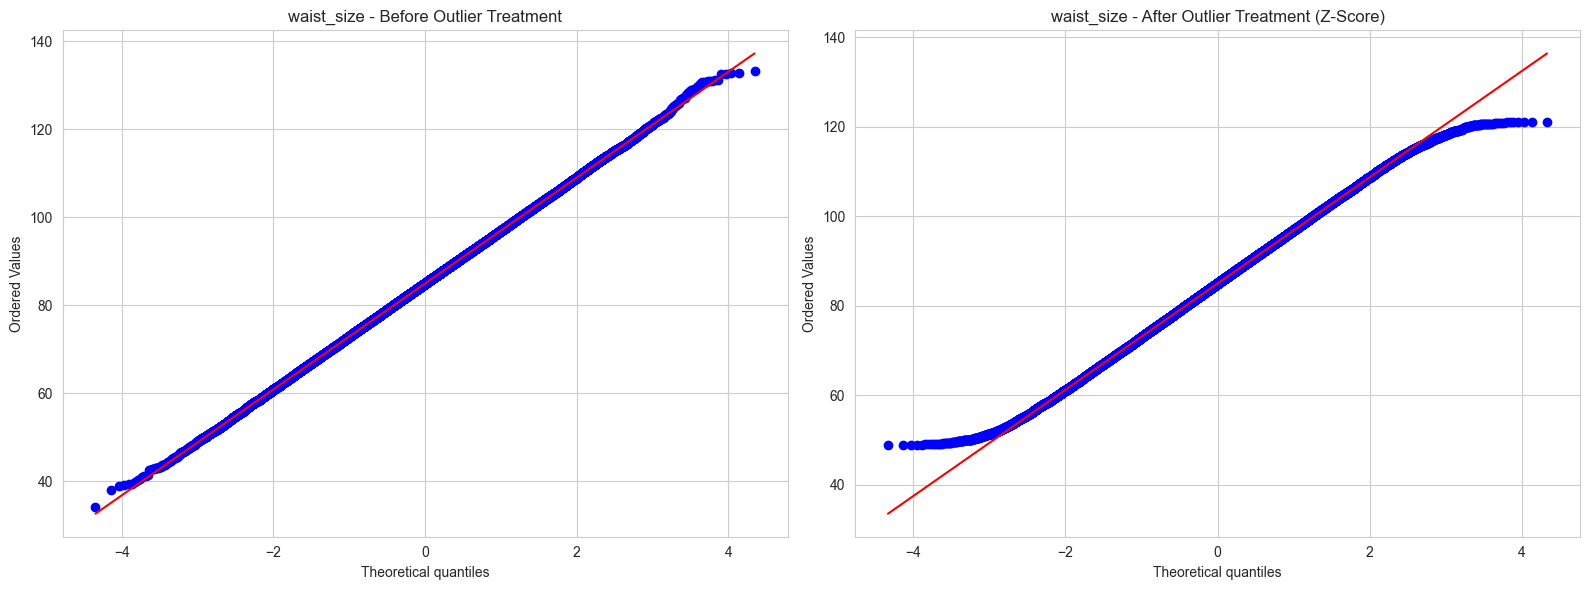

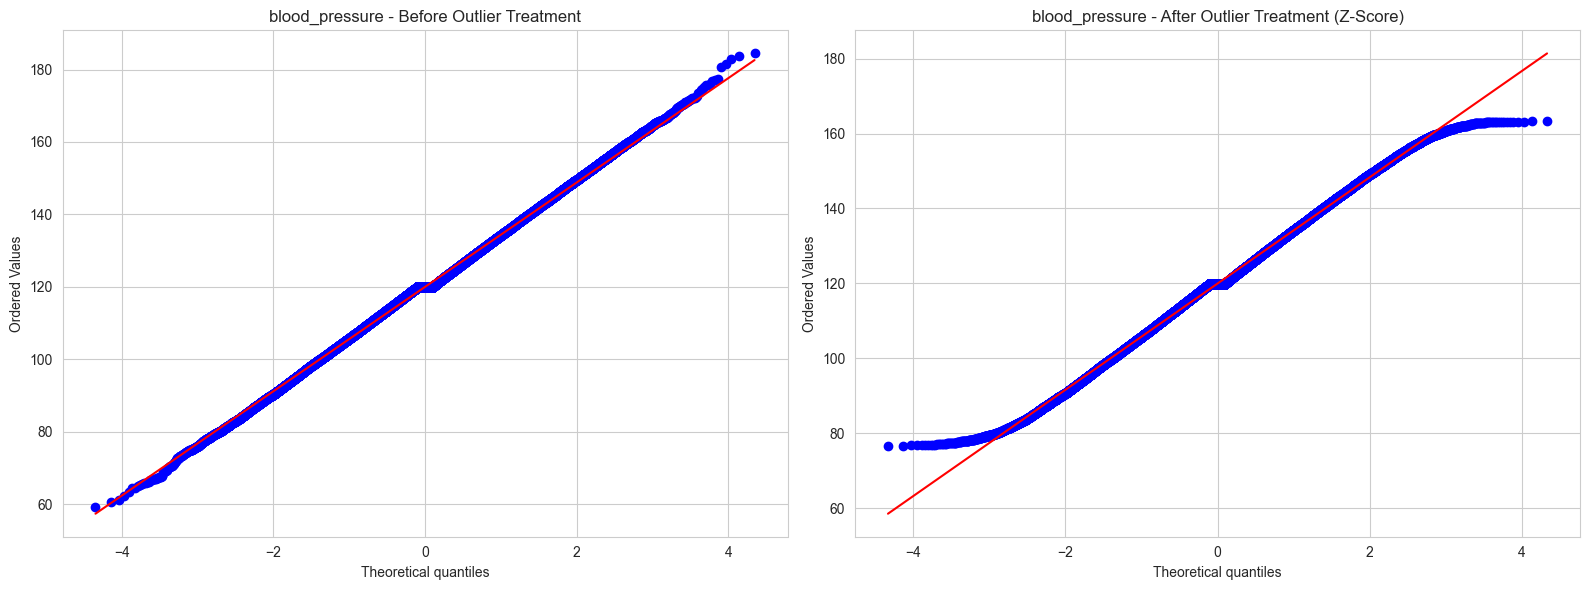

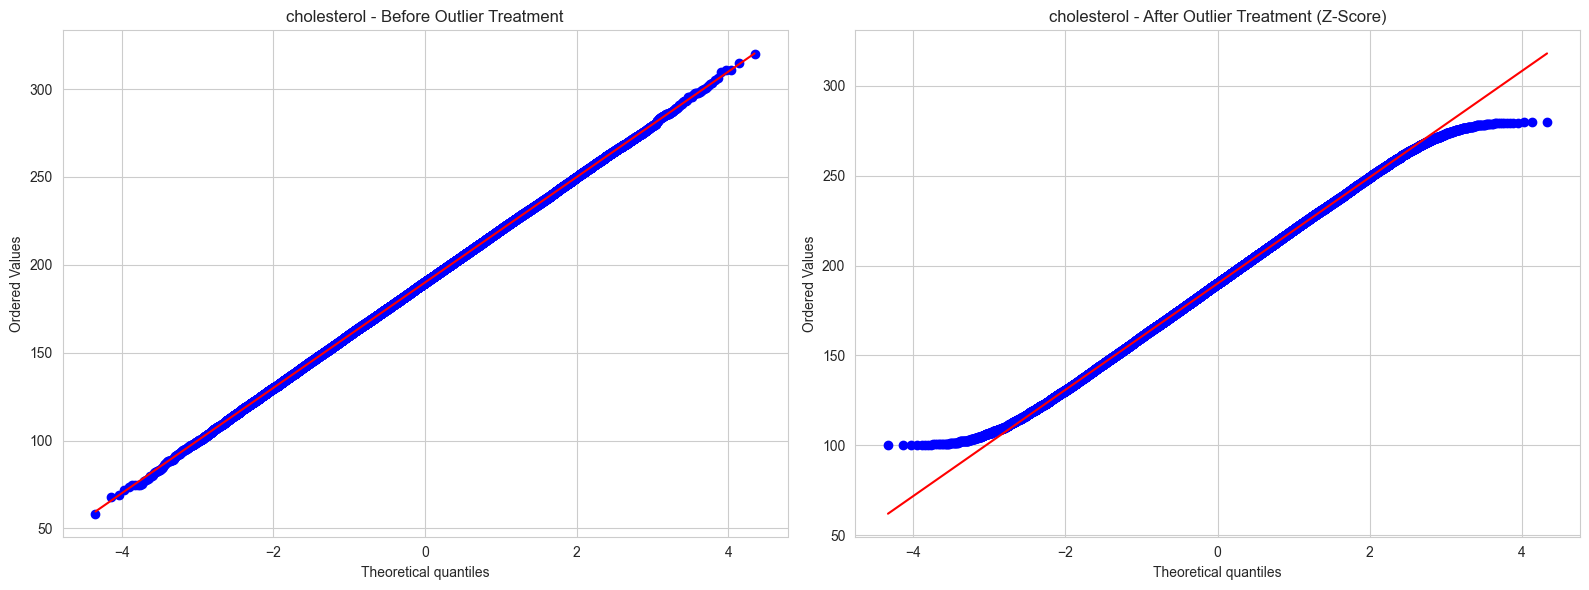

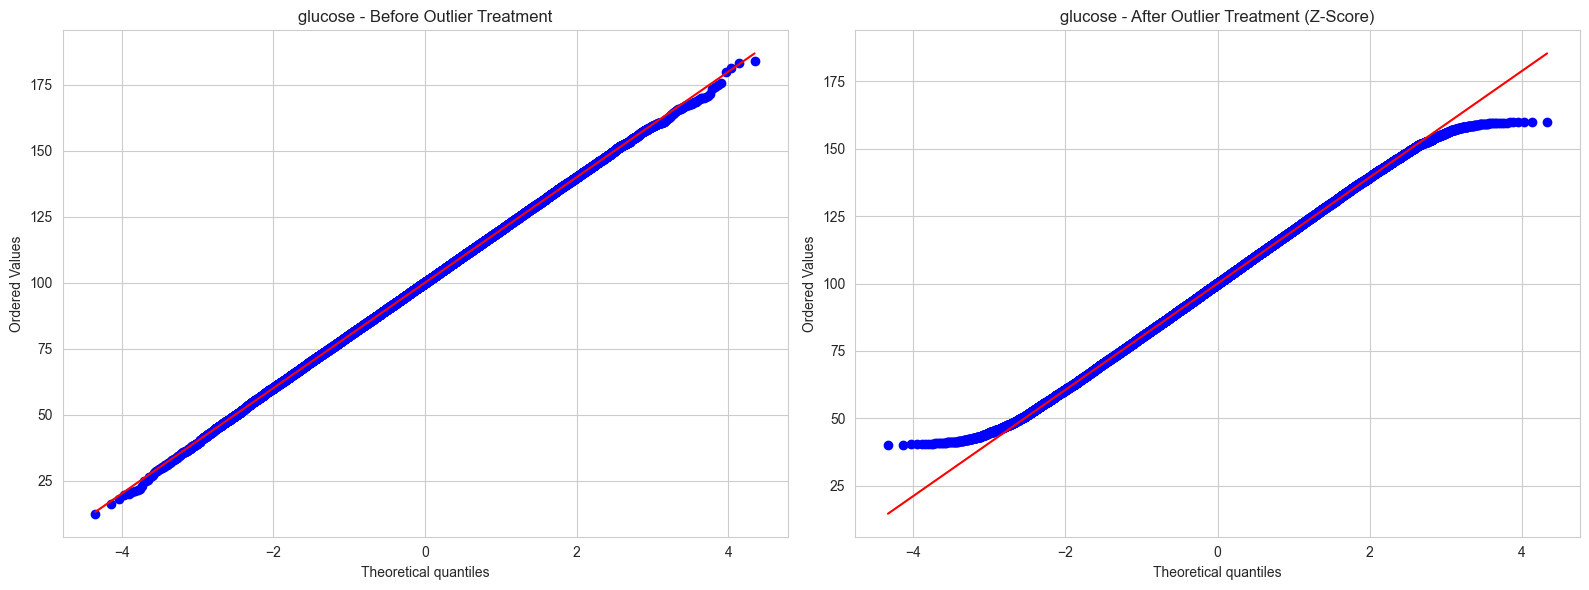

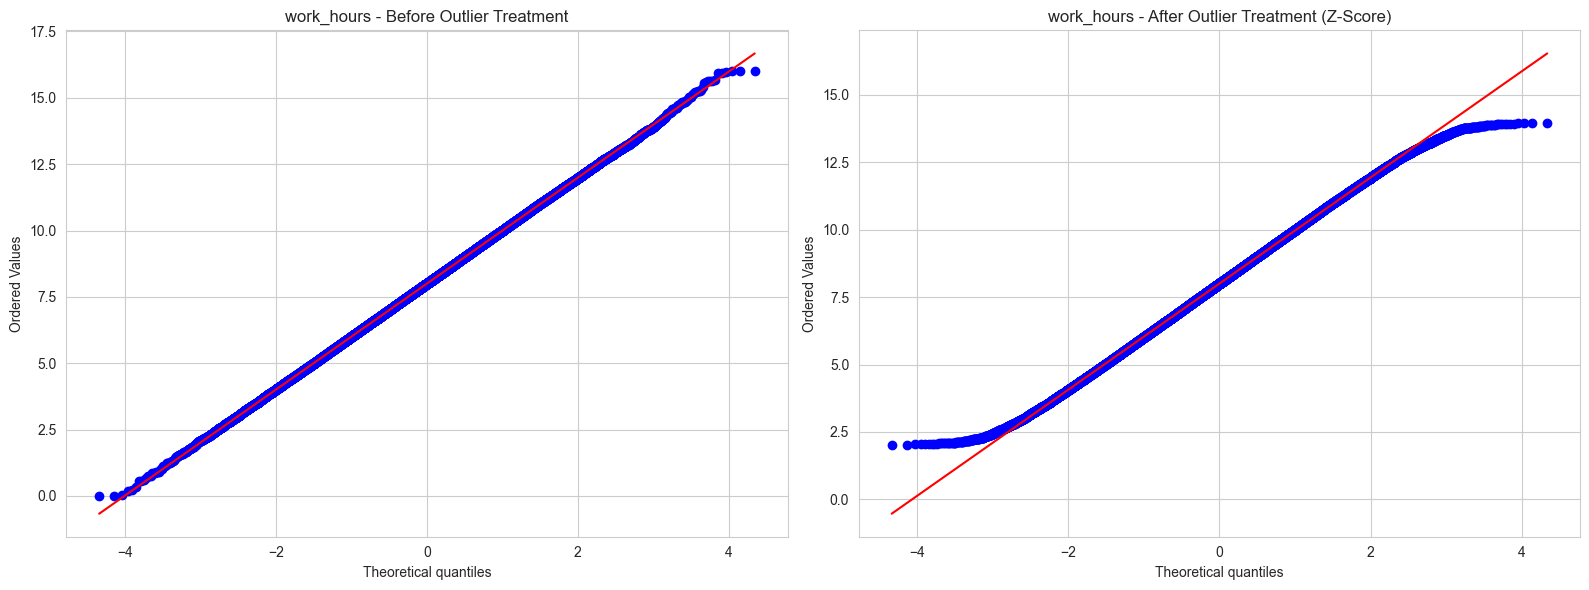

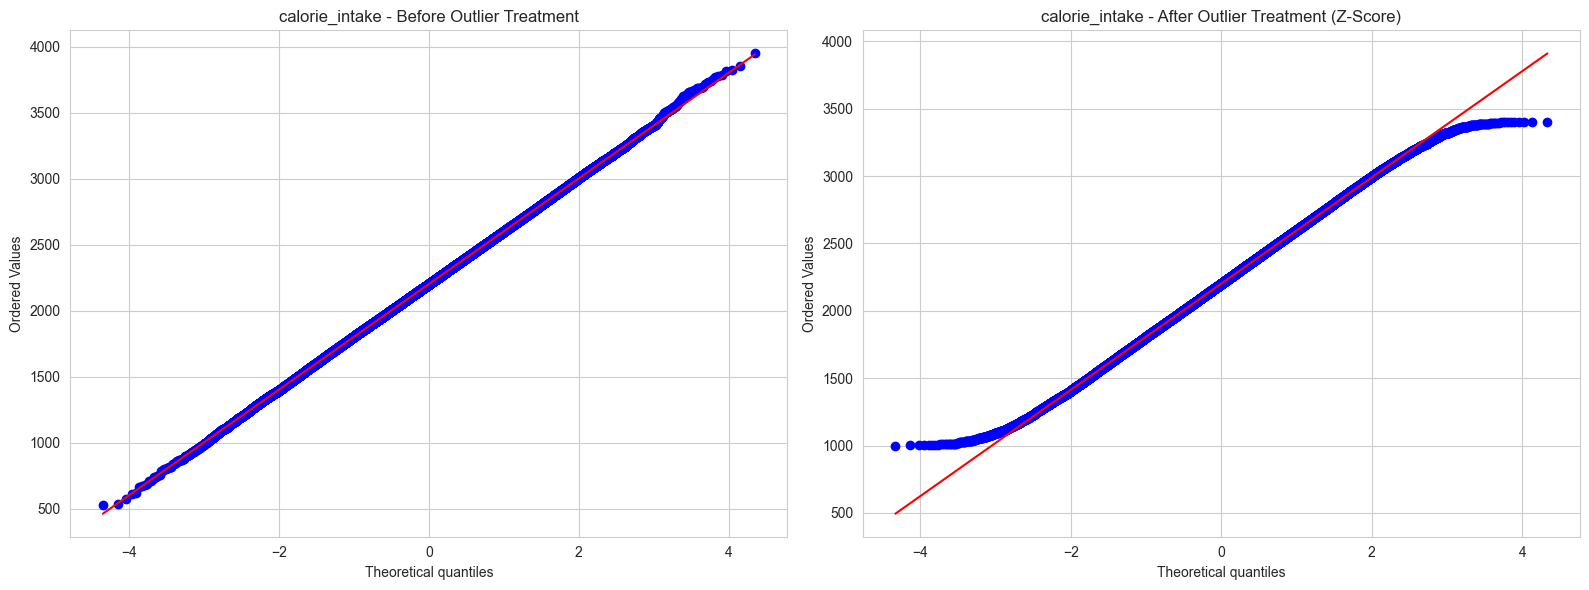

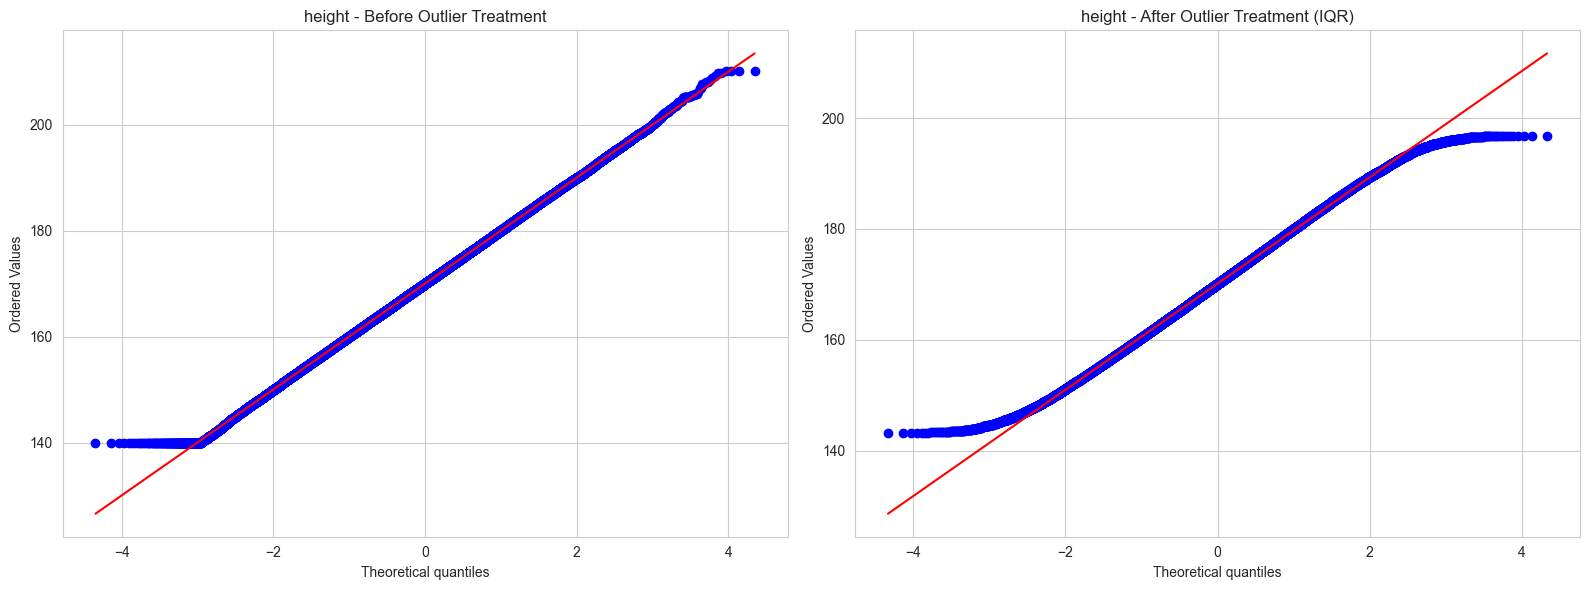

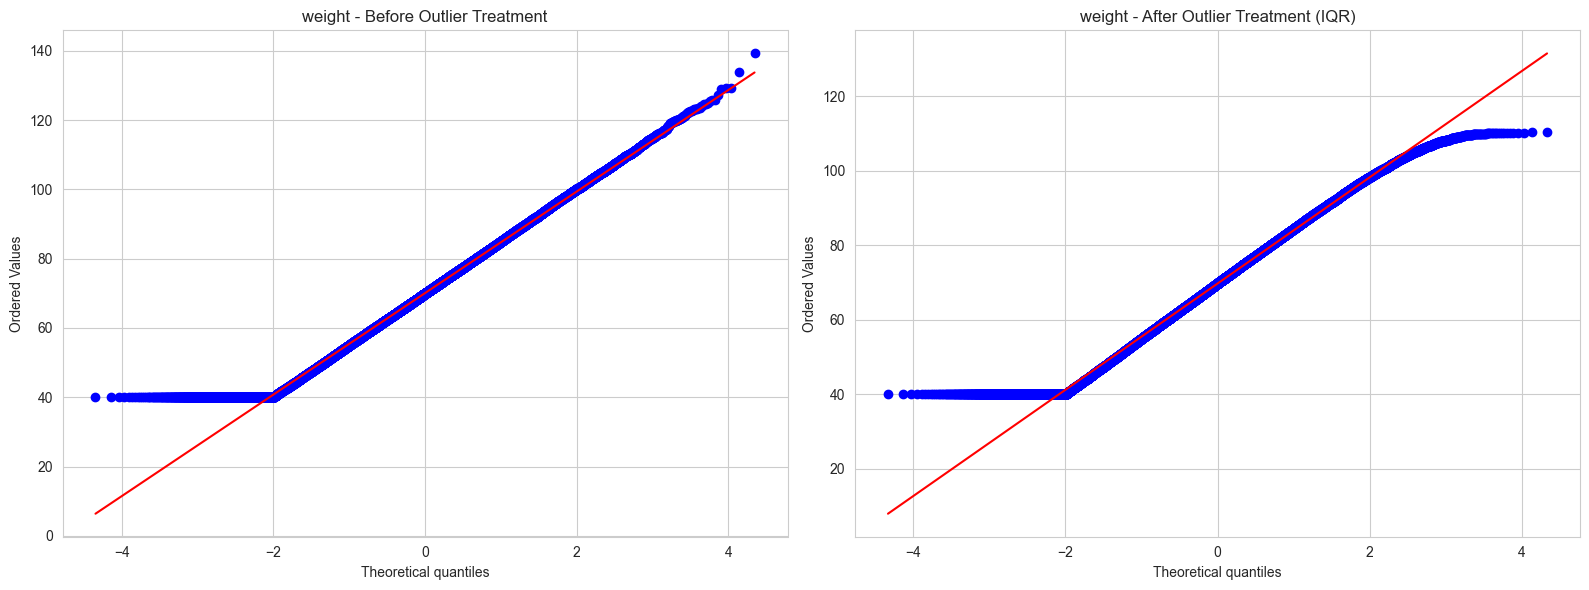

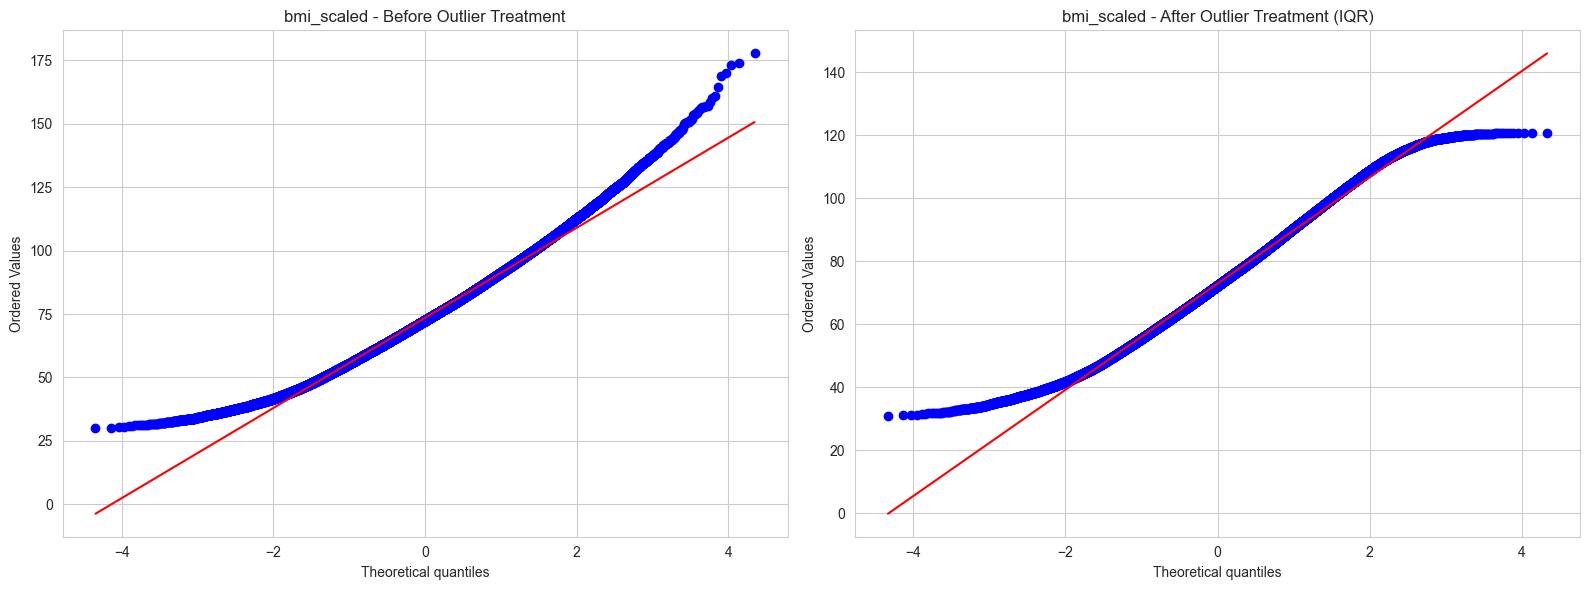

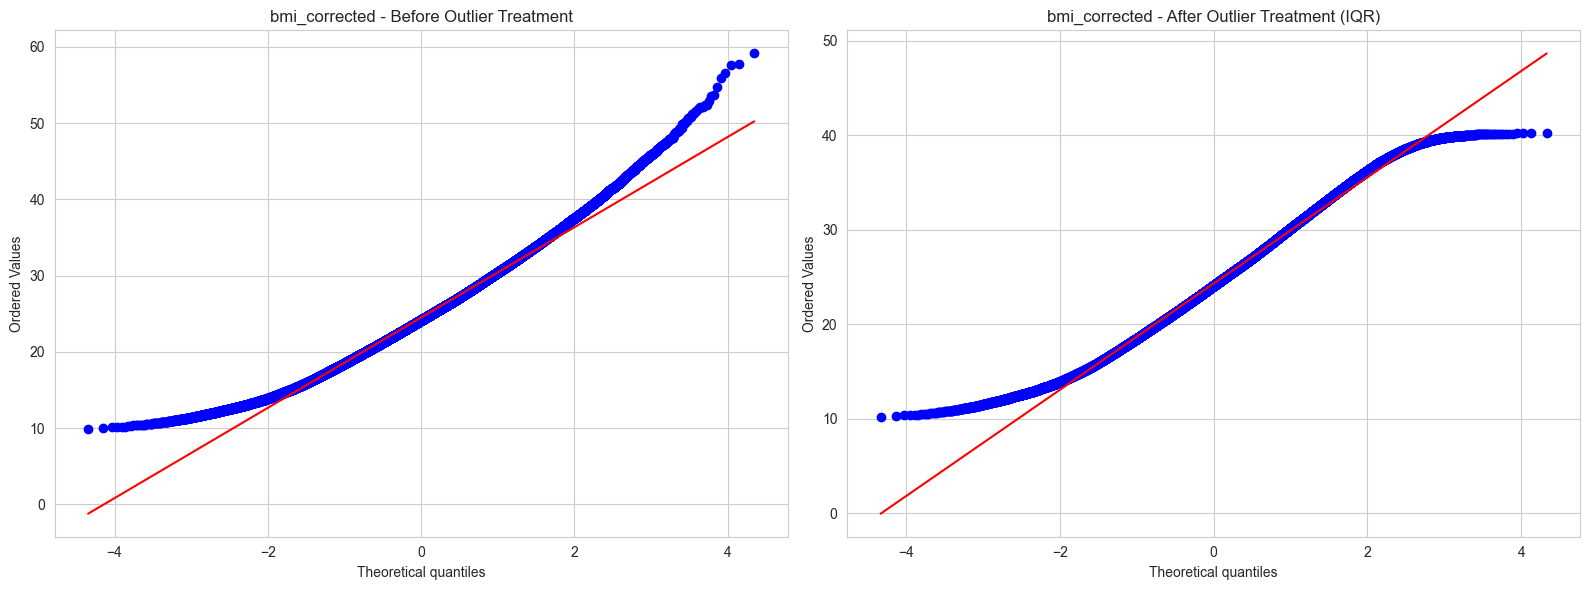

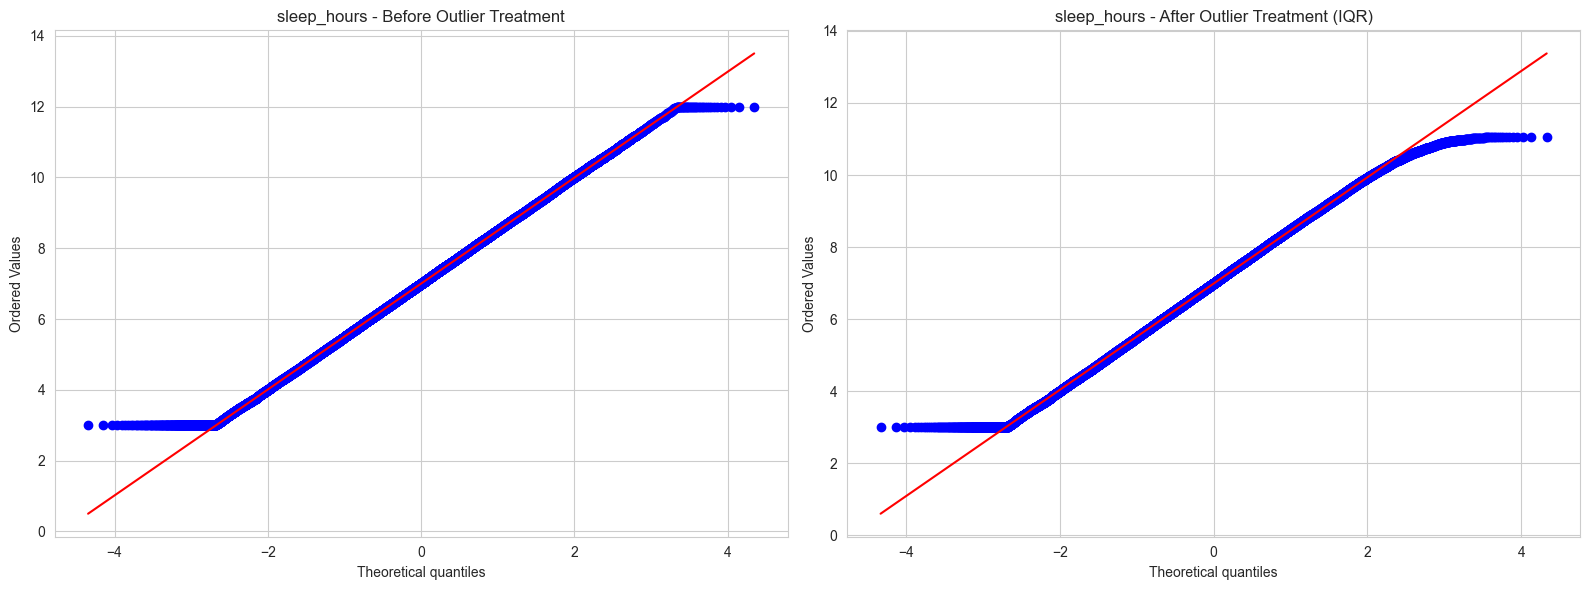

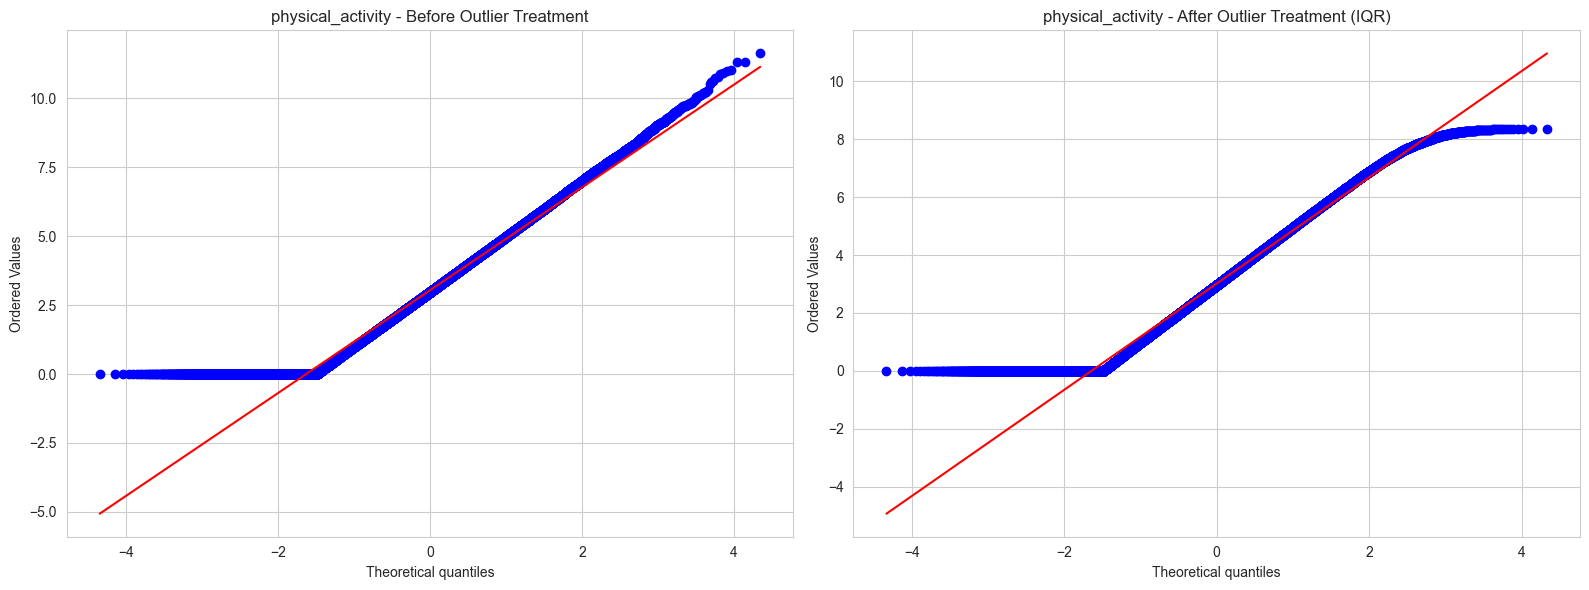

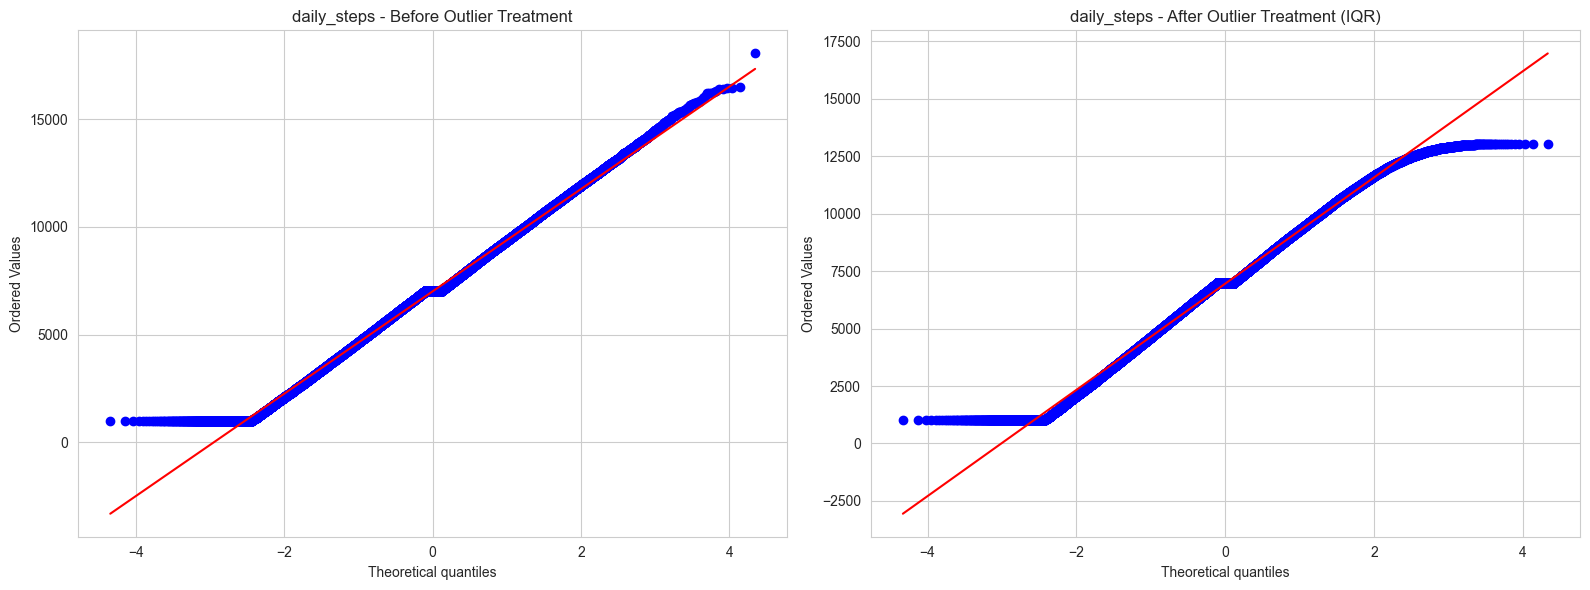

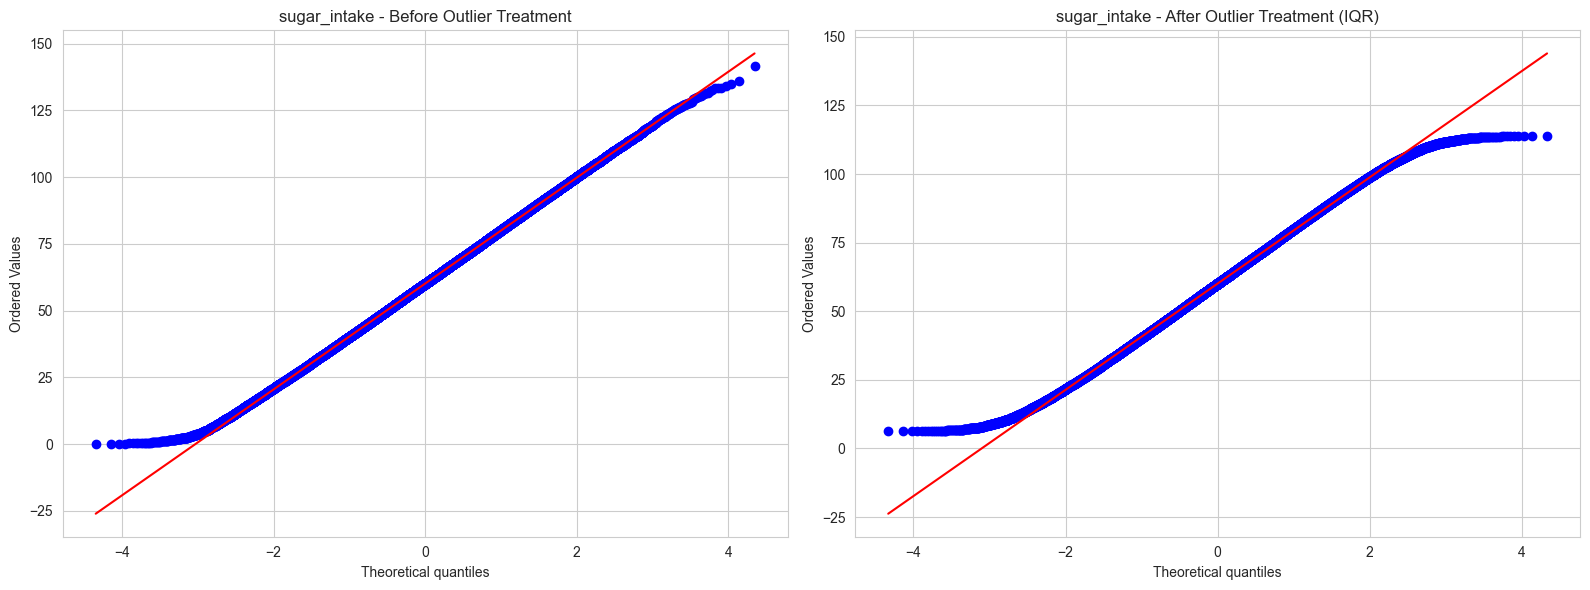

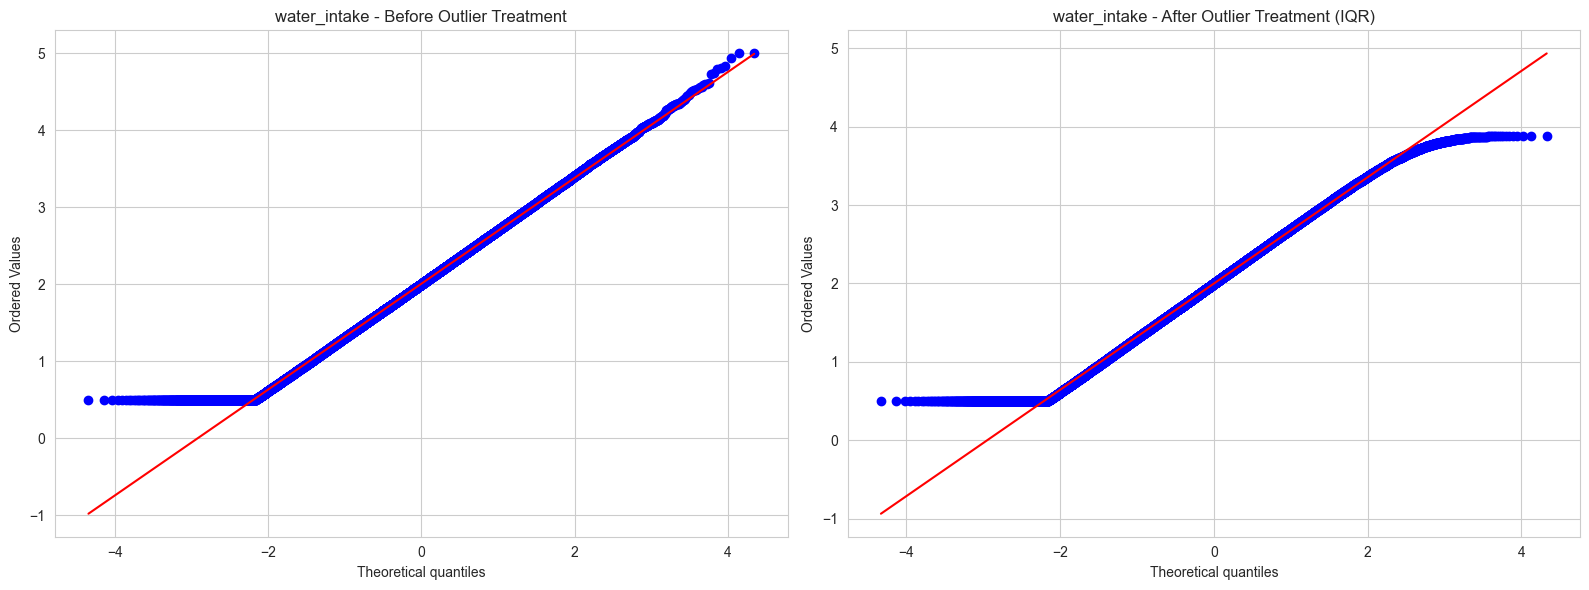

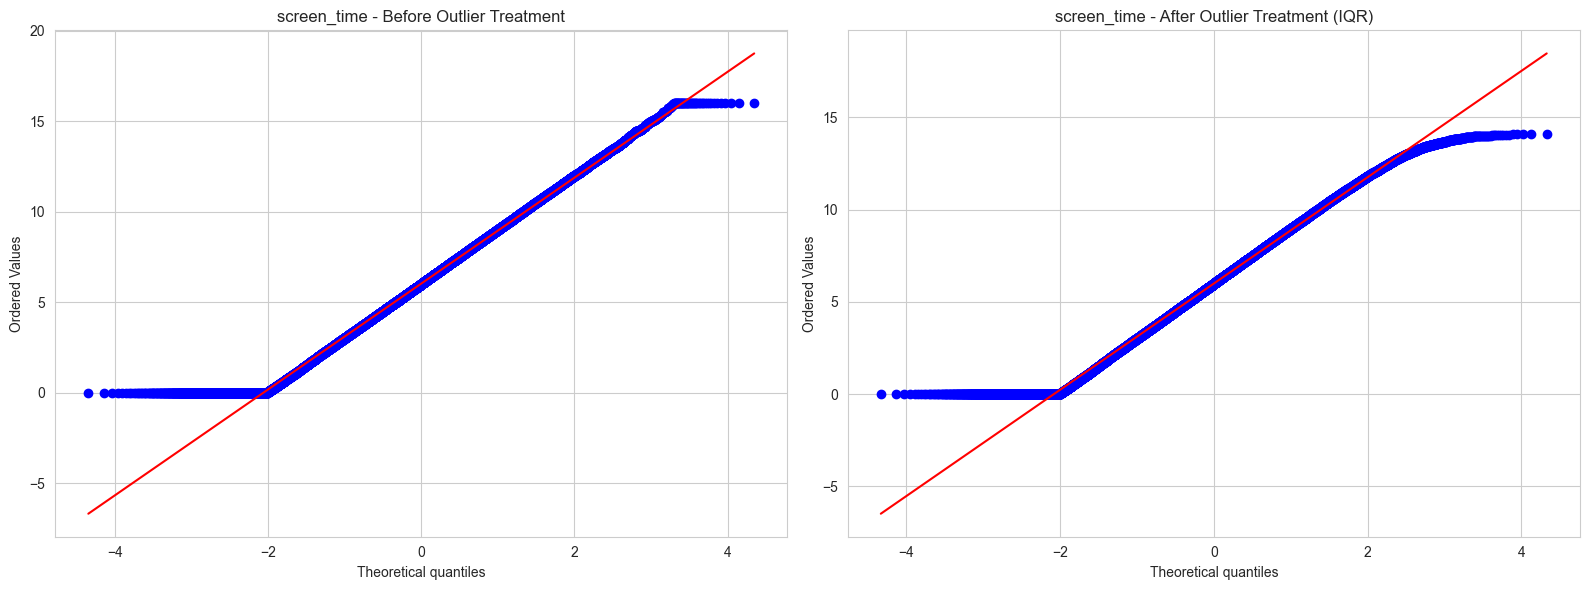

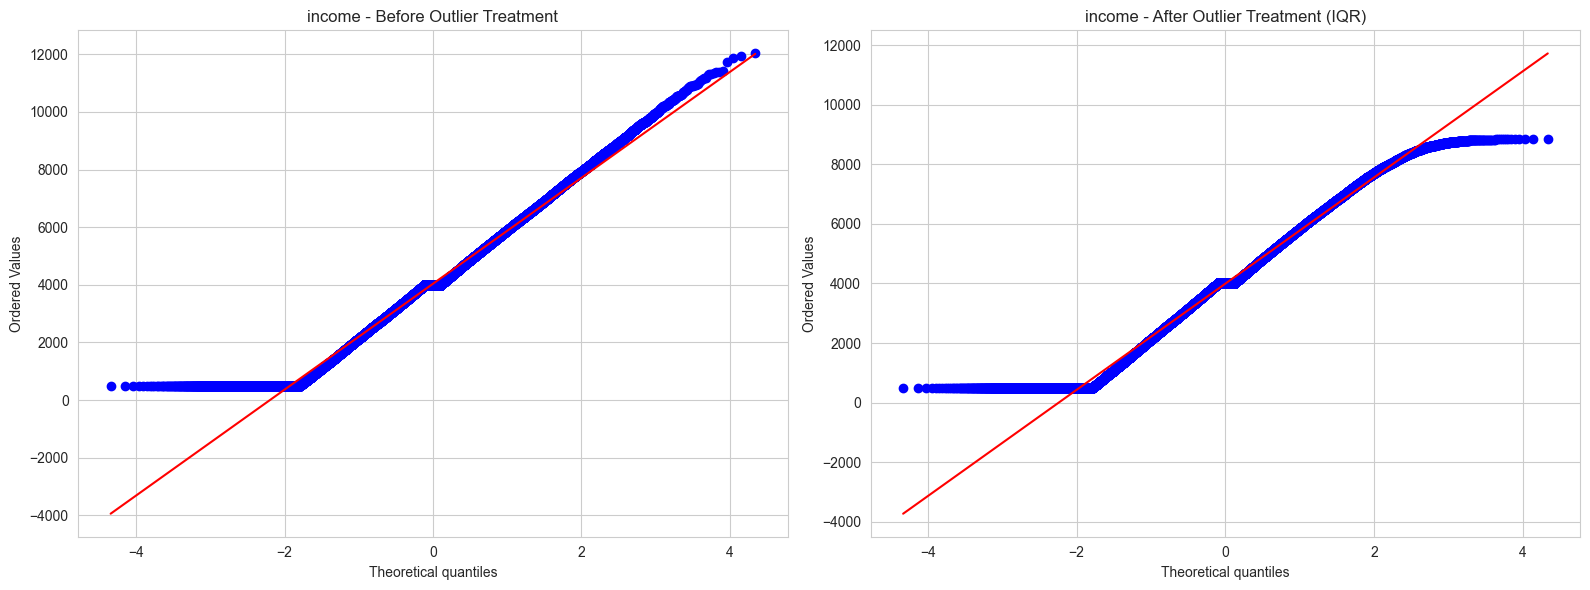

In [99]:
# Generate before/after comparison for all processed columns
sns.set_style('whitegrid')

if all_outlier_columns:
    print(f'Generating comparison plots for {len(all_outlier_columns)} columns with outliers...')
    
    for col in all_outlier_columns:
        # Determine which method was used
        method_used = 'Z-Score' if col in zscore_outlier_columns else 'IQR'
        
        plt.figure(figsize=(16, 6))
        
        # Before treatment
        plt.subplot(1, 2, 1)
        stats.probplot(df_after_mv[col].dropna(), plot=plt)
        plt.title(f'{col} - Before Outlier Treatment')
        
        # After treatment
        plt.subplot(1, 2, 2)
        stats.probplot(df_after_outliers[col].dropna(), plot=plt)
        plt.title(f'{col} - After Outlier Treatment ({method_used})')
        
        plt.tight_layout()
        plt.show()
else:
    print('No outliers found in any columns - no treatment needed')

In [100]:
# Final cleaned dataset 
df_out = df_after_outliers.copy()
print('Final cleaned shape:', df_out.shape)

# Quick validation check
df_out.isna().sum().sort_values(ascending=False).head(10).to_frame('missing_after')

Final cleaned shape: (93436, 38)


,missing_after
survey_code,0
diet_type,0
stress_level,0
mental_health_score,0
mental_health_support,0
education_level,0
job_type,0
occupation,0
income,0
device_usage,0


## 5. Profiling report

In [101]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df_out, title='Profiling Report (Cleaned)')
profile.to_file('ProfilingReport_cleaned.html')
profile.to_file('ProfilingReport_cleaned.json')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 38/38 [00:03<00:00, 10.88it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Render JSON:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 6. Save Cleaned Data

In [102]:
df_out.to_csv('cleaned_data.csv', index=False) # Save the cleaned data to a new CSV file
print('Cleaned data saved to cleaned_data.csv')

Cleaned data saved to cleaned_data.csv
